# Predicting California House Pricing using Features. 

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [2]:
# Load the California Housing dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target  # Target variable

In [3]:
# Convert dataset units
# MedInc is in tens of thousands of dollars
df['MedInc'] *= 10  # Convert to thousands of dollars

# MedHouseVal is in hundreds of thousands of dollars
df['MedHouseVal'] *= 100  # Convert to thousands of dollars

# Display the first few rows of the dataset
print("Dataset Preview:")
df.head()

Dataset Preview:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,83.252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,452.6
1,83.014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,358.5
2,72.574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,352.1
3,56.431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,341.3
4,38.462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,342.2


# Preprocessing
Removing extreme outliers from key features such as average rooms, bedrooms, population, and household occupancy. Then selecting the most influential features based on a correlation heatmap.

In [4]:
# Remove Outliers using IQR Method for Selected Features
features_to_filter = ["AveRooms", "AveBedrms", "Population", "AveOccup"]
for feature in features_to_filter:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [5]:
# Compute Correlation Matrix
correlation_matrix = df.corr()


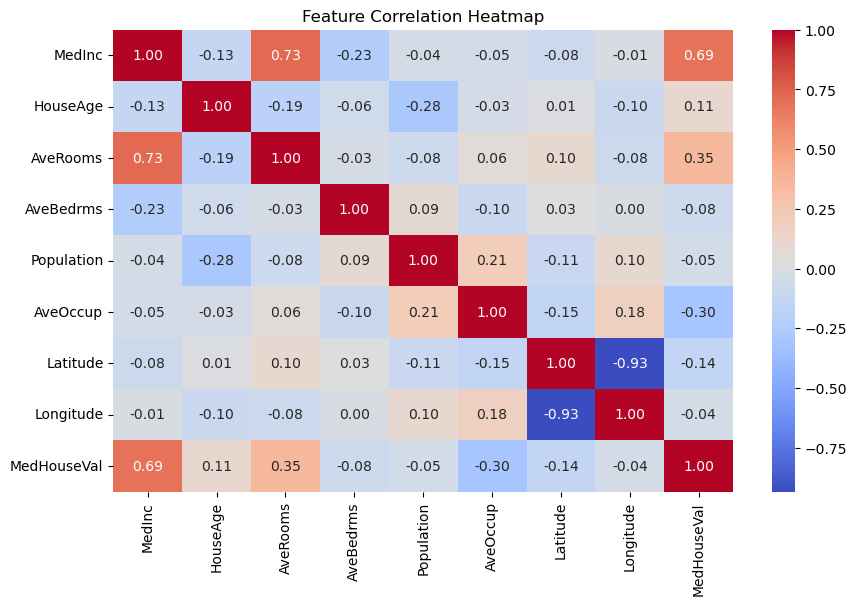

In [6]:
# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [7]:
# Selecting the Three Most Influential Features Based on Correlation with Target
important_features = correlation_matrix['MedHouseVal'].abs().sort_values(ascending=False).index[1:4].tolist()
print("Top 3 Most Influential Features:", important_features)


Top 3 Most Influential Features: ['MedInc', 'AveRooms', 'AveOccup']


# ML Modeling and Technique
Splitting the dataset into training (80%) and testing (20%) sets, applying standardization for uniformity. Using a linear regression model trained on the selected features to predict housing prices


In [8]:
X_imp = df[important_features]
y = df["MedHouseVal"]

In [9]:
# Splitting Data (80% training, 20% testing)
X_train_imp, X_test_imp, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling (Standardizing values)
scaler = StandardScaler()
X_train_imp = scaler.fit_transform(X_train_imp)
X_test_imp = scaler.transform(X_test_imp)


In [11]:
# Training the Model using Linear Regression
model_imp = LinearRegression()
model_imp.fit(X_train_imp, y_train)

# Making Predictions
y_pred_imp = model_imp.predict(X_test_imp)


# Findings
Using the 3 highest correllating features of MedInc, AveRooms, and AveOccup there is about a 60% accuracy rate in the prediction of housing pricing via linear regression. 

In [12]:
# Evaluating the Model
mse_imp = mean_squared_error(y_test, y_pred_imp)
mae_imp = mean_absolute_error(y_test, y_pred_imp)
r2_imp = r2_score(y_test, y_pred_imp)

# Convert results into percentages

r2_imp_percent = r2_imp * 100

print("Model Performance Using Top 3 Most Influential Features:")
print(f"Mean Squared Error (MSE): {mse_imp:.2f}")
print(f"Mean Absolute Error (MAE): {mae_imp:.2f}")
print(f"R-squared (R2 Score): {r2_imp_percent:.2f}%")


Model Performance Using Top 3 Most Influential Features:
Mean Squared Error (MSE): 5266.60
Mean Absolute Error (MAE): 53.99
R-squared (R2 Score): 59.44%


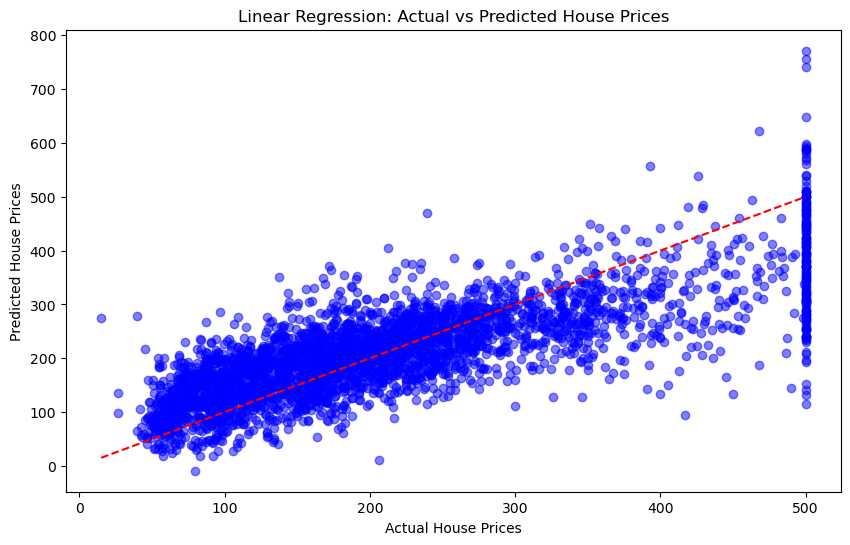

In [13]:
# Plotting Linear Regression Results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_imp, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Linear Regression: Actual vs Predicted House Prices")
plt.show()